# Telecom Churn Case-Study

The case study is performed by
* Asha Patil
* NagaRatna GS
* Vamsi Krishna GP
* Vishwas Saxsena

> <b>Business Objective: Predict the churn in the last month based on the given data.</b>
    
- For many incumbent operators, retaining high profitable customers is the number one business goal
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

> <b> Solution - Build a predictive model to identify customers at high risk of churn </b>

As the solution suggests we need to classify the given user if he will churn or not (1 or 0), implies a classfication problem

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from datetime import datetime

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold

#### Read the Initial Dataset and perform find out the number of unique values and missing values.

In [6]:
df = pd.read_csv('telecom_churn_data.csv')

In [7]:
print(df.shape)
df.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [8]:
df.nunique()

mobile_number           99999
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
                        ...  
arpu_2g_9                6795
night_pck_user_6            2
night_pck_

#### Lets observe the null values

In [9]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),2)

In [10]:
len(nul_percentage[nul_percentage>70])

40

#### There are more than 40 columns where there is more than 70% of missing data

If we observe the data set, there are many columns which are of type date. Lets check them

In [11]:
df.filter(like = "date", axis =1).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

* mobile number is unique for each user; lets conver that column to string as there is no valid point to make any analysis on the same.
* several date columns are available.
* After observing the data ,there are some categorical variables also; lets seggregate the same.

#### Below variables are picked as categorical variables as they can have only 3 values - Yes/No/Unknown

In [12]:
categorical_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

Lets check for missing values, unique values and impute missing values with meaning information

In [13]:
df[categorical_vars].isnull().sum()

night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_6           74846
fb_user_7           74428
fb_user_8           73660
fb_user_9           74077
dtype: int64

In [14]:
print(df[categorical_vars].nunique())
for col in categorical_vars:
    print(col, df[col].unique())

night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
fb_user_9           2
dtype: int64
night_pck_user_6 [ 0. nan  1.]
night_pck_user_7 [ 0. nan  1.]
night_pck_user_8 [ 0. nan  1.]
night_pck_user_9 [nan  0.  1.]
fb_user_6 [ 1. nan  0.]
fb_user_7 [ 1. nan  0.]
fb_user_8 [ 1. nan  0.]
fb_user_9 [nan  1.  0.]


* >(>74%) data is missing; As this is a categorical values lets impute the missing value by '-1' as new category and create dummies.

In [15]:
for col in categorical_vars:
    df[col].fillna(value=-1, inplace=True)

In [16]:
df.shape

(99999, 226)

#### Create Dummies for 6,7,8 months; 9th month is not required as its required to analyze the if the user is churned or not?

In [17]:
df_night_6 = pd.get_dummies(df['night_pck_user_6'],prefix="night_6",drop_first=True)
df_night_7 = pd.get_dummies(df['night_pck_user_7'],prefix="night_7",drop_first=True)
df_night_8 = pd.get_dummies(df['night_pck_user_8'],prefix="night_8",drop_first=True)

df_fb_6 = pd.get_dummies(df['fb_user_6'],prefix="fb_6", drop_first=True)
df_fb_7 = pd.get_dummies(df['fb_user_7'],prefix="fb_7",drop_first=True)
df_fb_8 = pd.get_dummies(df['fb_user_8'],prefix="fb_8",drop_first=True)

df = pd.concat([df,df_night_6],axis=1)
df = pd.concat([df,df_night_7],axis=1)
df = pd.concat([df,df_night_8],axis=1)

df = pd.concat([df,df_fb_6],axis=1)
df = pd.concat([df,df_fb_7],axis=1)
df = pd.concat([df,df_fb_8],axis=1)

In [18]:
df.shape

(99999, 238)

In [19]:
df.drop(labels=categorical_vars, axis=1, inplace=True)

In [20]:
df.shape

(99999, 230)

* lets recheck the missing value percentage

In [21]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),2)
print(sorted(nul_percentage, reverse=True))

[74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 4.76, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.62, 1.77, 1.66, 1.61, 1.1, 1.02, 1.02, 1.02, 0.6, 0.0, 0.0, 0.0, 0.0, 0

In [22]:
nul_percentage[nul_percentage>70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

* > If you observe there are two main columns which are required to calculate the amount of recharge to determine if the user is churned or not. lets impute the missing values for the below columns before proceeding further

* total_rech_data_6           74.85
* total_rech_data_7           74.43
* total_rech_data_8           73.66
* total_rech_data_9           74.08

* av_rech_amt_data_6          74.85
* av_rech_amt_data_7          74.43
* av_rech_amt_data_8          73.66
* av_rech_amt_data_9          74.08

In [23]:
cols_imp = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", "av_rech_amt_data_6", "av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9"]
df[cols_imp].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_rech_data_6,25153.0,2.463802,2.789128,1.0,1.0,1.0,3.0,61.0
total_rech_data_7,25571.0,2.666419,3.031593,1.0,1.0,1.0,3.0,54.0
total_rech_data_8,26339.0,2.651999,3.074987,1.0,1.0,1.0,3.0,60.0
total_rech_data_9,25922.0,2.441170,2.516339,1.0,1.0,2.0,3.0,84.0
av_rech_amt_data_6,25153.0,192.600982,192.646318,1.0,82.0,154.0,252.0,7546.0
av_rech_amt_data_7,25571.0,200.981292,196.791224,0.5,92.0,154.0,252.0,4365.0
av_rech_amt_data_8,26339.0,197.526489,191.301305,0.5,87.0,154.0,252.0,4076.0
av_rech_amt_data_9,25922.0,192.734315,188.400286,1.0,69.0,164.0,252.0,4061.0


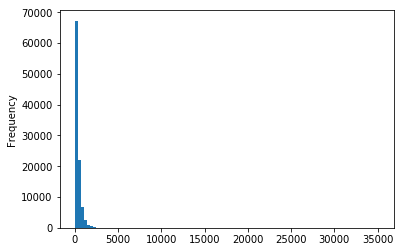

In [24]:
df['total_rech_amt_6'].plot.hist(bins=100)

In [25]:
for col in cols_imp:
    df[col].fillna(value=0, inplace=True)

In [26]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),2)
print(sorted(nul_percentage, reverse=True))
print('-'*50)
print(nul_percentage[nul_percentage>70])

[74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 4.76, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.62, 1.77, 1.66, 1.61, 1.1, 1.02, 1.02, 1.02, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

####  As the missing values for the colums is more than 74%, we can delete the above columns; But date columns can be used to derive new variables; Before deriving the same lets build the churn data for the users based on the below mentioned


1. Analyse the recharge colums and fill missing values for "As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)."
2. Filter high-value customers As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). # total_rech_data_6 # total_rech_data_7 # av_rech_amt_data_6 # av_rech_amt_data_7 

In [27]:
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7
df['total_data_rech_8'] = df.total_rech_data_8 * df.av_rech_amt_data_8
df['total_data_rech_9'] = df.total_rech_data_9 * df.av_rech_amt_data_9

In [28]:
df['total_amt_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['total_amt_7'] = df.total_rech_amt_7 + df.total_data_rech_7
df['total_amt_8'] = df.total_rech_amt_8 + df.total_data_rech_8
df['total_amt_9'] = df.total_rech_amt_9 + df.total_data_rech_9

In [29]:
cols_to_drop = ['total_rech_data_6', 'total_rech_data_7','total_rech_data_8','total_rech_data_9',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
               'total_data_rech_6','total_data_rech_7','total_data_rech_8','total_data_rech_9']
df.drop(labels=cols_to_drop, axis=1, inplace=True)
print(df.shape)

(99999, 226)


* Filter high-value customers As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). 

In [30]:
df['av_amt_rech_6_7']=(df.total_amt_6 + df.total_amt_7)/2

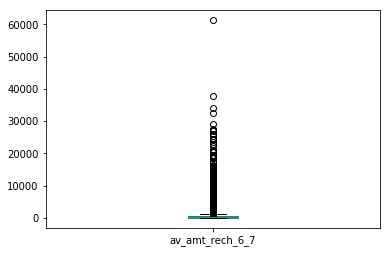

In [31]:
df['av_amt_rech_6_7'].plot.box()

In [32]:
df['av_amt_rech_6_7'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0        0.0
0.1       60.0
0.2      108.5
0.3      155.0
0.4      209.5
0.5      275.0
0.6      360.0
0.7      478.0
0.8      656.5
0.9     1028.0
1.0    61236.0
Name: av_amt_rech_6_7, dtype: float64

In [33]:
avg_amt_rech_2_mon = df['av_amt_rech_6_7'].quantile(0.7)

In [34]:
filter = (df['av_amt_rech_6_7'] >= avg_amt_rech_2_mon)

In [35]:
df = df[filter]
print(df.shape)

(30001, 227)


 *  After filtering the high-value customers, you should get about 29.9k rows3. Tag churners and remove attributes of the churn phase Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are: 
  * total_ic_mou_9 
  * total_og_mou_9 
  * vol_2g_mb_9 
  * vol_3g_mb_9
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names). 
    
* After applying filter we have around 30k rows ( ~ 100 rows extra - Need to check what else missed to take into account )

In [36]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,264.901497,500.869219,91.435910,349.513848
std,358.290694,666.902007,282.370006,947.079372
min,0.000000,0.000000,0.000000,0.000000
25%,50.480000,47.640000,0.000000,0.000000
50%,157.980000,284.940000,0.000000,0.000000
75%,343.540000,698.680000,38.000000,320.610000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [37]:
def isUserChurn(df):
  if(df['total_ic_mou_9'] > 0 or df['total_og_mou_9'] > 0 or df['vol_2g_mb_9'] > 0 or df['vol_3g_mb_9'] > 0):
    return 0
  else:
    return 1

In [38]:
df['churn'] = df.apply(isUserChurn, axis=1)

In [39]:
df.shape

(30001, 228)

In [40]:
# dropping 9th month cols
cols_to_drop = (list(df.filter(like ='_9', axis =1).columns))

In [41]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [42]:
cols_to_drop = list(df.filter(like='sep', axis=1).columns)
print(cols_to_drop)

['sep_vbc_3g']


In [43]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [44]:
unique_Values = df.apply(lambda x: x.nunique())
# print(unique_Values)

In [45]:
unique_Values[unique_Values==1]

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
dtype: int64

In [46]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 176 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float

In [47]:
df.shape

(30001, 176)

#### Convert date columns to Date object and derive new variable

In [48]:
date_cols = list(df.filter(like='date', axis=1).columns)
print(len(date_cols), date_cols)

9 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


<font color=red>Taking some time to run</font>

In [49]:
for date_col in date_cols:
    df[date_col]=pd.to_datetime(df[date_col])

In [50]:
df['date_last_rech'] = df[['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8']].max(axis=1)

In [51]:
df[['date_last_rech']].isnull().sum()

date_last_rech    0
dtype: int64

In [52]:
df['date_last_rech_data'] = df[['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_7']].max(axis=1)

In [53]:
df['date_last_rech_data'].isnull().sum()

10501

* Now we have date of last recharge; lets convert to days from last recharge; since we are considering only till 8th month(Aug); Need to find the diff from 31 Aug to the column value

In [54]:
df['days_since_last_recharge'] = df['date_last_rech'].apply(lambda x: datetime(2014, 8, 31) - x)

In [55]:
df['days_since_last_recharge'] = df['days_since_last_recharge'].apply(lambda x: x.days)

In [56]:
# df['days_since_last_recharge']

In [57]:
df['days_since_last_recharge_data'] = df['date_last_rech_data'].apply(lambda x: datetime(2014, 8, 31) - x)

In [58]:
df['days_since_last_recharge_data'] = df['days_since_last_recharge_data'].apply(lambda x: x.days)

In [59]:
df['days_since_last_recharge_data'].isnull().sum()

10501

* <font color=green>In case of missing values lets assume user didnt recharged the same. so lets fill the missing values with max value 90 (assuming number of days in 3 months days)</font>

In [60]:
df['days_since_last_recharge_data'] = df['days_since_last_recharge_data'].fillna(90)

* <font color='green'>Usage includes both data/voice; so lets finalize the days since last recharge as min(voice, data)</font>

In [61]:
df['days_since_last_rech'] = df[['days_since_last_recharge_data', 'days_since_last_recharge']].min(axis=1)

#### <font color='blue'> New Derived Variable =  days_since_last_rech </font>

* Lets remove all date related columns and intermediate derived variables

In [62]:
date_cols = list(df.filter(like='date', axis=1).columns)
print(len(date_cols), date_cols)

11 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_last_rech', 'date_last_rech_data']


In [63]:
df.drop(labels=date_cols, axis=1,inplace=True)

#### Lets clean up the data, where there is no variance explained

In [64]:
unique_Values = df.apply(lambda x: x.nunique())

In [65]:
unique_Values[unique_Values==1]

circle_id           1
loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
dtype: int64

In [66]:
cols_to_drop = list(unique_Values[unique_Values==1].index)

In [67]:
df.shape

(30001, 170)

In [68]:
len(cols_to_drop)

10

In [69]:
df.drop(labels=cols_to_drop,axis=1, inplace=True)

In [70]:
df.shape

(30001, 160)

In [71]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),2)
print(sorted(nul_percentage, reverse=True))
print('-'*50)
print(nul_percentage[nul_percentage>40])

[46.83, 46.83, 46.83, 46.83, 46.83, 44.15, 44.15, 44.15, 44.15, 44.15, 43.15, 43.15, 43.15, 43.15, 43.15, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
max_rech_data_6    44.15
max_rech_dat

In [72]:
cols_to_drop = nul_percentage[nul_percentage>40].index
print(cols_to_drop, len(cols_to_drop))

Index(['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object') 15


In [73]:
df.shape

(30001, 160)

In [74]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [75]:
df.shape

(30001, 145)

In [76]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),2)
print(sorted(nul_percentage, reverse=True))

[3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### rows have all missing values

In [77]:
print(df.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = df.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

0


0        54
77       27
111      27
188      27
358      27
364      27
414      27
423      27
527      27
539      54
687      81
690      27
723      27
788      27
845      27
895      27
933      27
934      27
1138     54
1255     27
1489     54
1500     54
1524     27
1555     54
1623     27
1754     27
1768     27
1877     27
1952     27
2063     27
         ..
98254    27
98271    27
98317    27
98420    27
98612    27
98635    27
98790    54
98823    27
98872    27
98943    81
98962    27
99000    27
99034    27
99070    27
99135    81
99142    81
99195    27
99246    27
99296    27
99323    27
99338    81
99391    27
99398    27
99436    27
99611    27
99625    27
99700    27
99790    54
99827    27
99851    54
Length: 1497, dtype: int64

In [78]:
rows_missing_data.value_counts()

0     28504
27      992
81      254
54      251
dtype: int64

In [79]:
rows_missing_data.value_counts(normalize=True)

0     0.950102
27    0.033066
81    0.008466
54    0.008366
dtype: float64

* Around 4% of data is missing in the data(across the rows), lets remove those rows

In [80]:
df = (df[df.isnull().sum(axis=1) < 27])

In [81]:
df.shape

(28504, 145)

In [82]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),4)
print(sorted(nul_percentage, reverse=True))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [83]:
nul_percentage[nul_percentage>0]

Series([], dtype: float64)

In [84]:
df.isnull().any().any()

False

* There are no missing values

In [85]:
# df.fillna(0, inplace=True)

In [86]:
print(list(df.columns))

['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_i

In [87]:
cols_to_drop = ['days_since_last_recharge', 'days_since_last_recharge_data',
                'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                'av_amt_rech_6_7']

In [88]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [89]:
df[['aon']].describe()

,aon
count,28504.000000
mean,1234.055817
std,964.182647
min,180.000000
25%,472.000000
50%,876.000000
75%,1815.000000
max,4321.000000


In [90]:
print(df.aon.min(), df.aon.max())

180 4321


* AON is represented in days, if we observe the min and max value its 180 and 4321 which is 6 months and 144 months; It means we can represent AON in 6 months buckets.

In [91]:
df['aon_bin'] = pd.cut(df['aon'], bins=24, include_lowest=False, labels=np.arange(1,25))

In [92]:
df[['aon','aon_bin']].head(10)

,aon,aon_bin
7,802,4
8,315,1
21,720,4
23,604,3
33,1328,7
38,1155,6
41,2010,11
48,1265,7
53,697,3
56,729,4


In [93]:
df.drop(labels='aon', axis=1, inplace=True)

In [94]:
df['aon_bin'] = df['aon_bin'].astype(int)

### <font color=blue>New Derived Variable "aon_bin"</font>

In [95]:
# df.info(verbose=1)

## DataCleaning results

In [96]:
df.shape

(28504, 139)

* Initial shape - (99999, 226)
* After cleaning - (28504, 139)

lets save the data frame as cleaned.csv

In [97]:
df.to_csv('telecom_churn_clean.csv', index=False, sep=',')

#### Lets work on cleaned data file

In [3]:
df_churn = pd.read_csv('telecom_churn_clean.csv')

## EDA

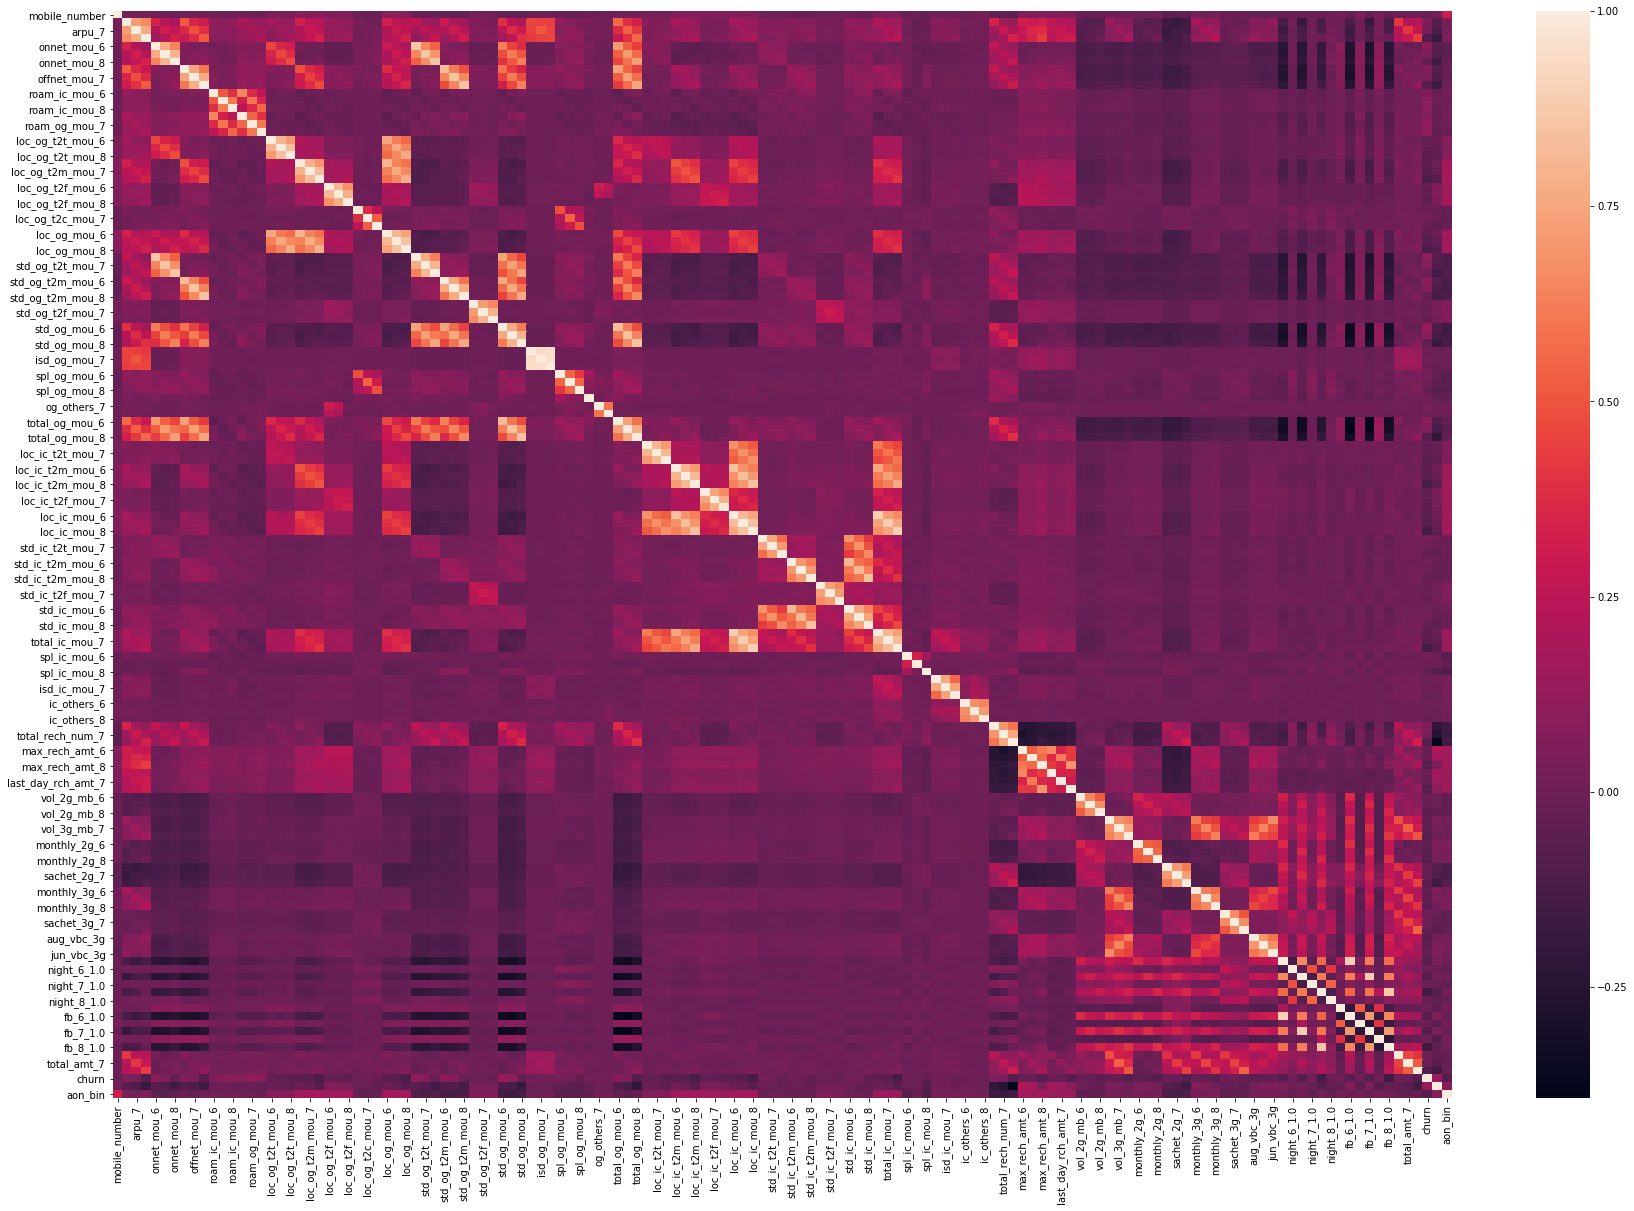

In [99]:
plt.figure(figsize=(30,20))
sns.heatmap(df_churn.corr())

* Inferences - After initial observation at most of the columns the correlation < 0.25 except at some places. Since we cant analyse all the 136 features lets analyse some of the variables like - aon/total_amt vs days_since_last_recharge etc., and draw inferences from them

   aon_bin  churn
0        4      1
1        1      0
2        4      0
3        3      0
4        7      0
<class 'pandas.core.frame.DataFrame'> Index(['churn'], dtype='object')
   aon_bin  churn
0        1    356
1        2    319
2        3    181
3        4    191
4        5    131


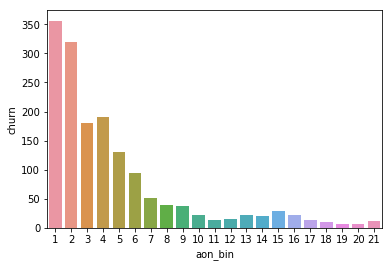

In [100]:
df_aon = df_churn[['aon_bin', 'churn']]

print(df_aon.head())

df_aon_churn = df_aon[df_aon.churn==1]

df_aon_churn_grp = df_aon_churn.groupby('aon_bin').sum()

print(type(df_aon_churn_grp), df_aon_churn_grp.columns)

df_aon_churn_grp.reset_index(inplace=True)
print(df_aon_churn_grp.head())

%matplotlib inline
sns.barplot(x='aon_bin', y = 'churn', data=df_aon_churn_grp)

* Inference - from the above graph we can observe that most of the churns are more till aon_bin is 6(each aon_bin is 6 months), implies 3 years. so till 3 years there are high chances that customer may churn; post 3 years number of churns are less and can assume those who are churn are of other reasons

In [101]:
# total_amt_6	total_amt_7	total_amt_8-> churn

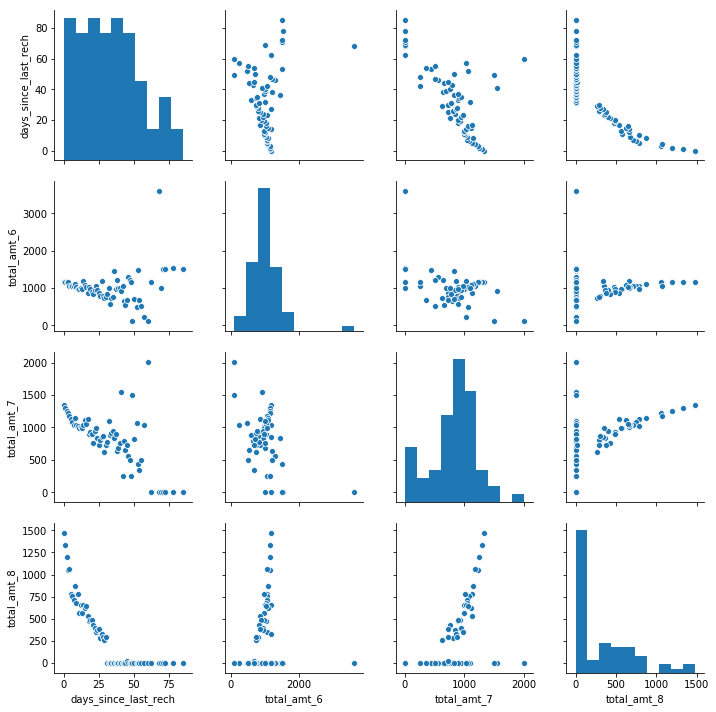

In [102]:
# total_amt_6	total_amt_7	total_amt_8 days_since_last_rech
df_amt = df_churn[['total_amt_6','total_amt_7','total_amt_8','days_since_last_rech']]
df_amt_grp = df_amt.groupby('days_since_last_rech').mean()
df_amt_grp.reset_index(inplace=True)
sns.pairplot(df_amt_grp)

* Inference - We can observe days_since_last_rechage has an increasing trend with respect to month

Index(['days_since_last_rech', 'arpu_6', 'arpu_7', 'arpu_8'], dtype='object')
   days_since_last_rech       arpu_6       arpu_7       arpu_8
0                   0.0  3760409.535  3976004.219  4053149.442
1                   1.0  2698542.569  2780933.503  2797861.776
2                   2.0  1836376.614  1880931.913  1787084.727
3                   3.0  1609724.809  1655985.061  1550772.158
4                   4.0  1023200.091  1033238.342   961227.220


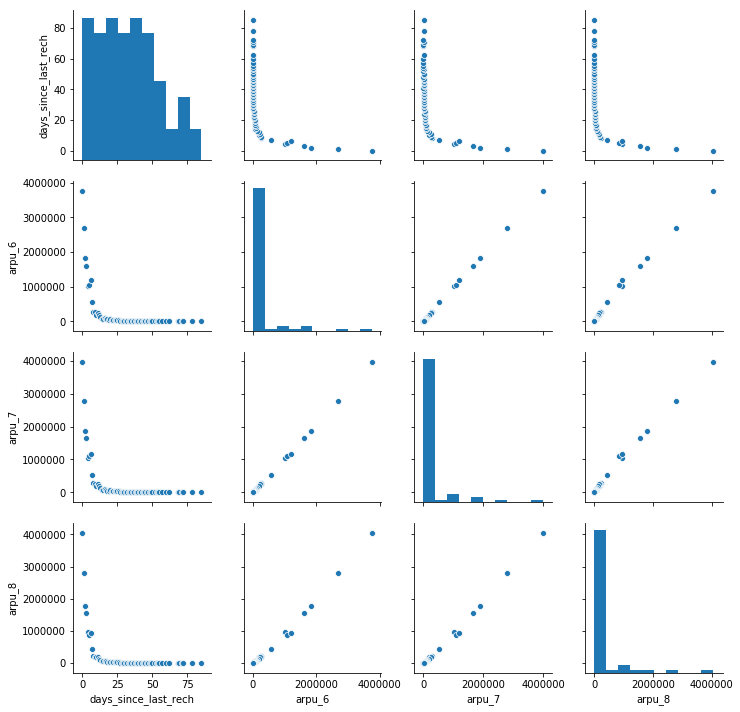

In [103]:
df_arpu = df_churn[['arpu_6','arpu_7','arpu_8','days_since_last_rech']]
# print(df_arpu.head())

df_arpu_grp = df_arpu.groupby(by='days_since_last_rech').sum()

df_arpu_grp.reset_index(inplace=True)

print(df_arpu_grp.columns)

print(df_arpu_grp.head())

sns.pairplot(df_arpu_grp)

* Inference From above we can see that revenue is significantly low for customers with days since last recharge greater than ~5

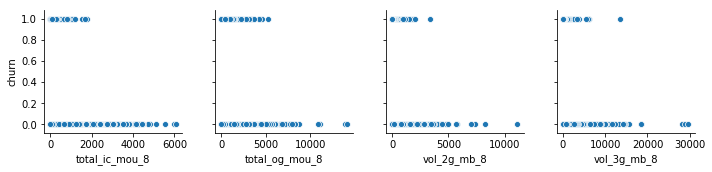

In [104]:
dependent_var = ['churn']
sns.pairplot(df_churn, x_vars=['total_ic_mou_8', 'total_og_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8'], y_vars=dependent_var)

#### Look for correlation between important tag variables total_ic_mou_8', 'total_og_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8

In [105]:
important_vars = ['total_ic_mou_8', 'total_og_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8']

df_total_ic_mou_8 = pd.DataFrame(df_churn.groupby(['total_ic_mou_8'])['churn'].mean().sort_values(ascending = False))
df_total_og_mou_8 = pd.DataFrame(df_churn.groupby(['total_og_mou_8'])['churn'].mean().sort_values(ascending = False))
df_vol_2g_mb_8 = pd.DataFrame(df_churn.groupby(['vol_2g_mb_8'])['churn'].mean().sort_values(ascending = False))
df_vol_2g_mb_8 = pd.DataFrame(df_churn.groupby(['vol_3g_mb_8'])['churn'].mean().sort_values(ascending = False))

print('Correlation between churn and total_ic_mou_8 = ', round(np.corrcoef(df_churn.churn, df_churn.total_ic_mou_8)[0,1],2))
print('Correlation between churn and total_og_mou_8 = ', round(np.corrcoef(df_churn.churn, df_churn.total_og_mou_8)[0,1],2))
print('Correlation between churn  and total_og_mou_8 = ', round(np.corrcoef(df_churn.churn, df_churn.total_og_mou_8)[0,1],2))
print('Correlation between churn  and total_og_mou_8 = ', round(np.corrcoef(df_churn.churn, df_churn.total_og_mou_8)[0,1],2))

Correlation between churn and total_ic_mou_8 =  -0.13
Correlation between churn and total_og_mou_8 =  -0.09
Correlation between churn  and total_og_mou_8 =  -0.09
Correlation between churn  and total_og_mou_8 =  -0.09


* important variables  total_ic_mou_8', 'total_og_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8 have no correlation



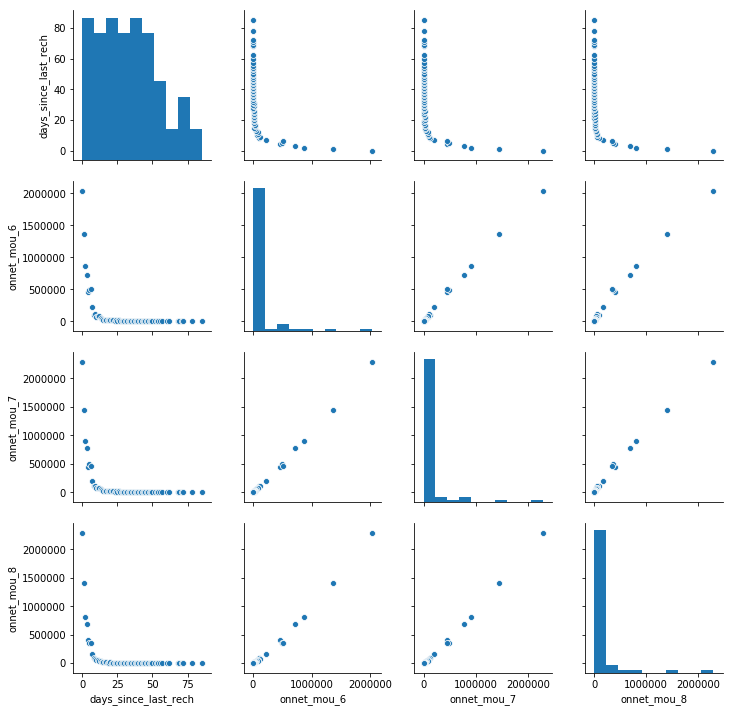

In [106]:
df_arpu = df_churn[['onnet_mou_6','onnet_mou_7','onnet_mou_8','days_since_last_rech']]
df_arpu_grp = df_arpu.groupby(by='days_since_last_rech').sum()
df_arpu_grp.reset_index(inplace=True)
sns.pairplot(df_arpu_grp)

* Inference - we can observe the number of calls on the same network are reduced as number of days since last recharege; typically after 25 days it shows no calls are made

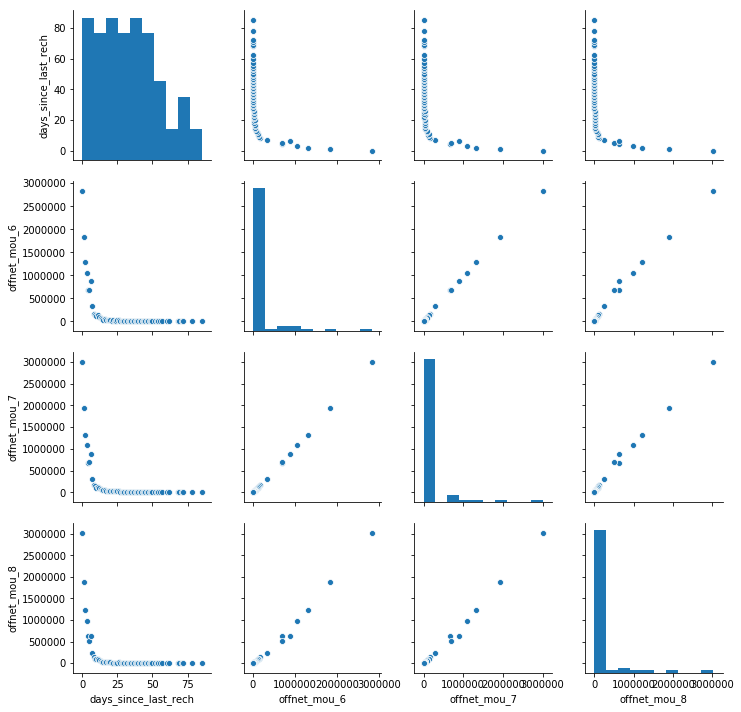

In [107]:
df_arpu = df_churn[['offnet_mou_6','offnet_mou_7','offnet_mou_8','days_since_last_rech']]
df_arpu_grp = df_arpu.groupby(by='days_since_last_rech').sum()
df_arpu_grp.reset_index(inplace=True)
sns.pairplot(df_arpu_grp)

* inference - both onnet/offnet follows the same pattern

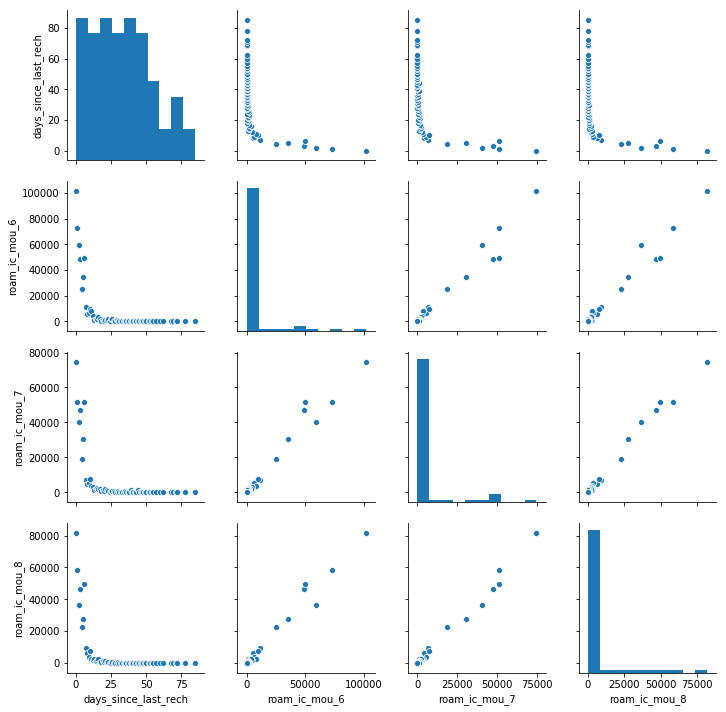

In [108]:
df_arpu = df_churn[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','days_since_last_rech']]
df_arpu_grp = df_arpu.groupby(by='days_since_last_rech').sum()
df_arpu_grp.reset_index(inplace=True)
sns.pairplot(df_arpu_grp)

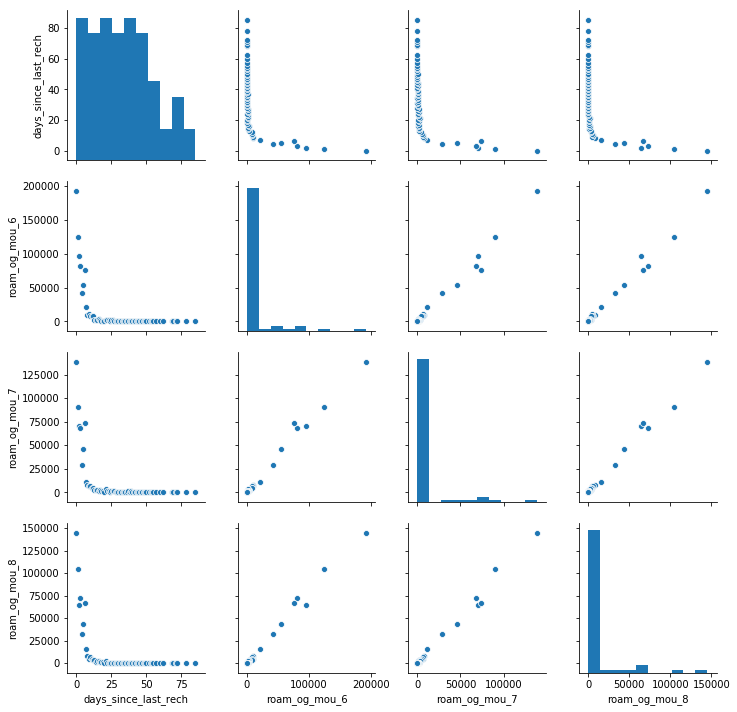

In [109]:
df_arpu = df_churn[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','days_since_last_rech']]
df_arpu_grp = df_arpu.groupby(by='days_since_last_rech').sum()
df_arpu_grp.reset_index(inplace=True)
sns.pairplot(df_arpu_grp)

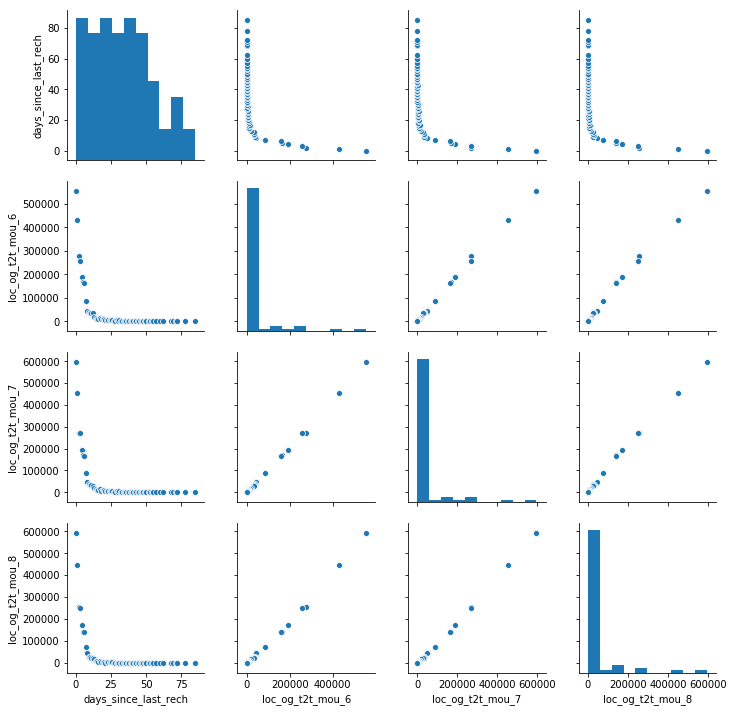

In [110]:
df_arpu = df_churn[['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','days_since_last_rech']]
df_arpu_grp = df_arpu.groupby(by='days_since_last_rech').sum()
df_arpu_grp.reset_index(inplace=True)
sns.pairplot(df_arpu_grp)

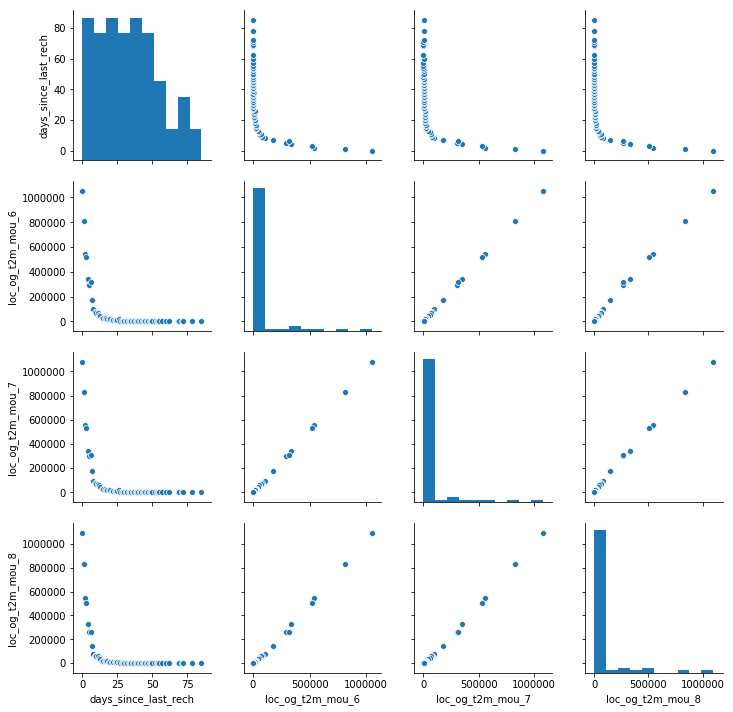

In [111]:
df_arpu = df_churn[['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','days_since_last_rech']]
df_arpu_grp = df_arpu.groupby(by='days_since_last_rech').sum()
df_arpu_grp.reset_index(inplace=True)
sns.pairplot(df_arpu_grp)

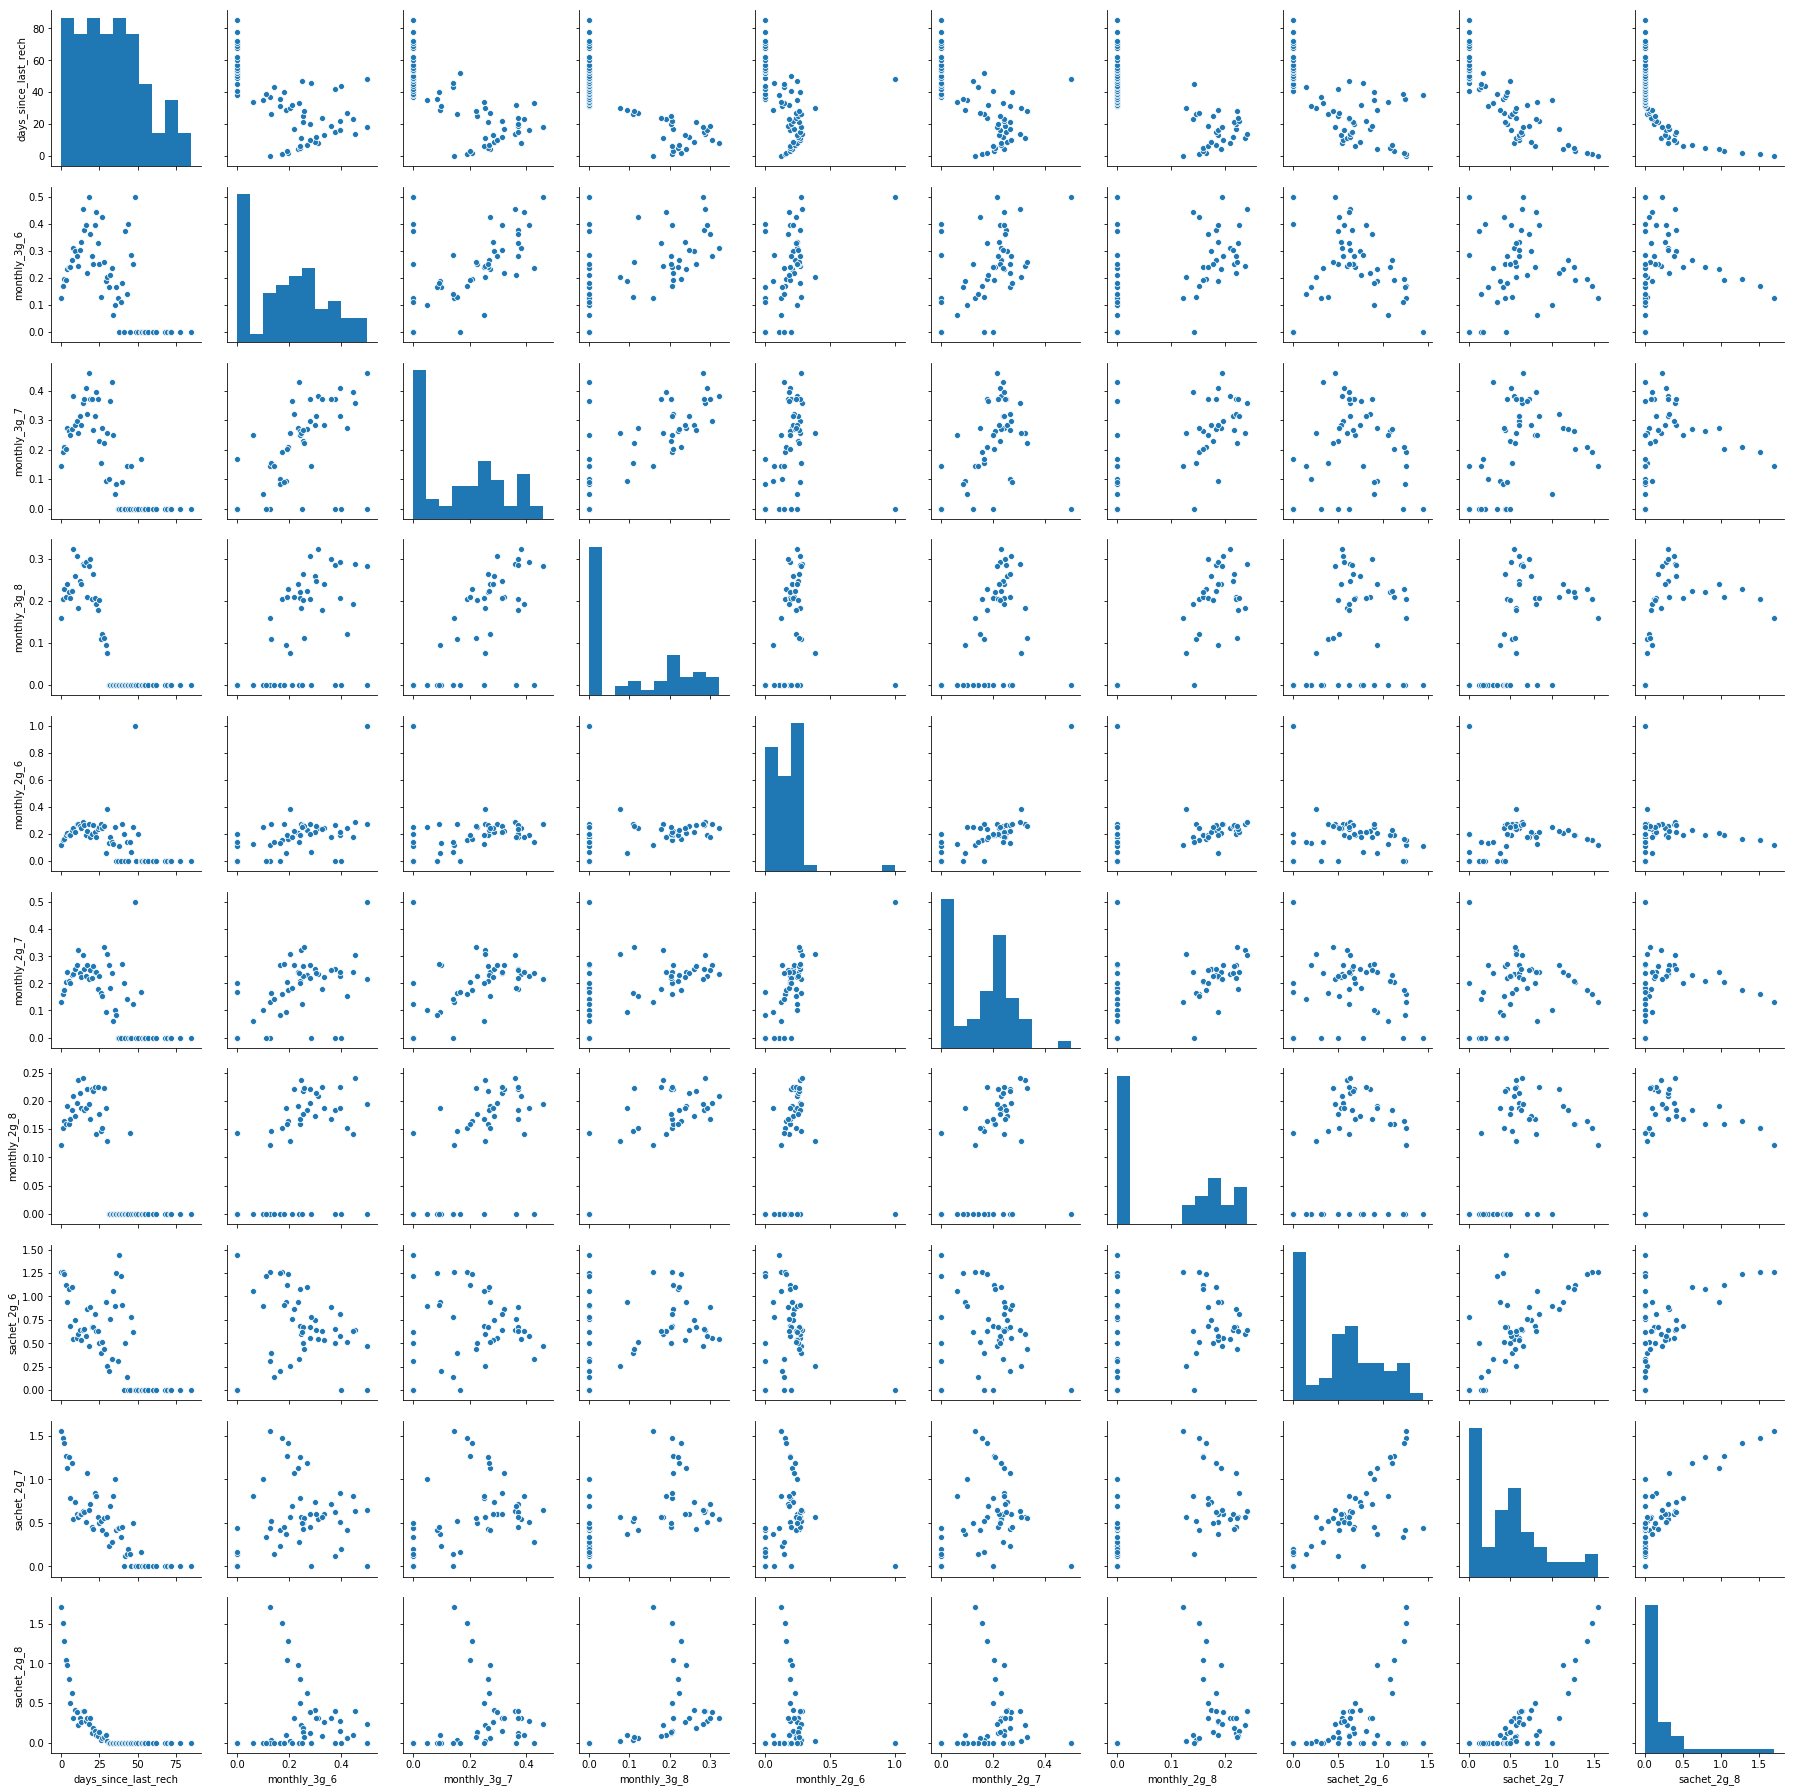

In [112]:
df_arpu = df_churn[['monthly_3g_6','monthly_3g_7','monthly_3g_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','days_since_last_rech']]
df_arpu_grp = df_arpu.groupby(by='days_since_last_rech').mean()
df_arpu_grp.reset_index(inplace=True)
sns.pairplot(df_arpu_grp)

* Inference - Typically it follows the same pattern for most of the variables w.r.t days_since_last_rech

## Modelling

In [4]:
df_churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_7_0.0,fb_7_1.0,fb_8_0.0,fb_8_1.0,total_amt_6,total_amt_7,total_amt_8,churn,days_since_last_rech,aon_bin
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,1580.0,790.0,3638.0,1,5.0,4
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,1,0,1,437.0,955.0,327.0,0,1.0,1
2,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0,600.0,680.0,718.0,0,0.0,4
3,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,0,1,0,1,0.0,1166.0,979.0,0,7.0,3
4,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,6343.0,23230.0,910.0,0,5.0,7


In [5]:
print(df_churn.shape)
df_churn.info(verbose=1)

(28504, 139)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Data columns (total 139 columns):
mobile_number           int64
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_6        float64
loc_og_t2f_mou_7        float64
loc_og_t2f_mou_8        float64
loc_og_t2c_mou_6        float64
loc_og_t2c_mou_7        float64
loc_og_t2c_mou_

* Target Variable - CHURN
* Unique Variable - MOBILE NUMBER
* Rest all - Independent Variable

> Mobile number can be dropped as its a identifier variable

In [6]:
df_churn.drop(labels='mobile_number', axis=1, inplace=True)

In [7]:
X = df_churn.drop(labels='churn', axis=1)
y = df_churn['churn']

* lets observe the target variable (churn)

In [8]:
y.value_counts()

0    26908
1     1596
Name: churn, dtype: int64

In [9]:
y.value_counts(normalize=True)

0    0.944008
1    0.055992
Name: churn, dtype: float64

> There is huge imbalance in the target variable; It consists only 5% of the total data

So before applying, PCA and any other classification model, we need to tackle the imbalance of the Target variable
* Here, we are choosing to apply SMOTE(Synthetic Minority Over-sampling Technique) analysis

Modelling Procedure - 
1. Apply StandardScaler
2. Split data for train and test
3. Apply SMOTE
4. Apply PCA
5. Apply LogisticRegression and SVM for classification
6. Compare metrics and decide on the model

In [10]:
scaler = StandardScaler()

Xscaled = scaler.fit_transform(X)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
Xscaled = pd.DataFrame(Xscaled, index=X.index, columns=X.columns)

In [12]:
Xscaled.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_6_1.0', 'fb_7_0.0', 'fb_7_1.0', 'fb_8_0.0', 'fb_8_1.0',
       'total_amt_6', 'total_amt_7', 'total_amt_8', 'days_since_last_rech',
       'aon_bin'],
      dtype='object', length=137)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(19952, 137)
(8552, 137)


In [15]:
print("Train Data Imbalance =\n", y_train.value_counts())
print('-'*50)
print("TEst Data Imbalance =\n",y_test.value_counts())

Train Data Imbalance =
 0    18798
1     1154
Name: churn, dtype: int64
--------------------------------------------------
TEst Data Imbalance =
 0    8110
1     442
Name: churn, dtype: int64


In [16]:
print("Train Data Imbalance =\n", y_train.value_counts(normalize=True)*100)
print('-'*50)
print("TEst Data Imbalance =\n",y_test.value_counts(normalize=True)*100)

Train Data Imbalance =
 0    94.216119
1     5.783881
Name: churn, dtype: float64
--------------------------------------------------
TEst Data Imbalance =
 0    94.831618
1     5.168382
Name: churn, dtype: float64


### Apply SMOTE

In [17]:
sm = SMOTE(random_state=42)

In [18]:
X_train_smote,y_train_smote = sm.fit_sample(X_train,y_train)

In [19]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(37596, 137)
(37596,)


In [20]:
print(len(y_train_smote)-np.count_nonzero(y_train_smote))
print(len(y_train)-np.count_nonzero(y_train))

18798
18798


In [21]:
np.unique(y_train_smote)

array([0, 1], dtype=int64)

In [22]:
print((y_train_smote != 0).sum()/(y_train_smote == 0).sum())

1.0


> After applying SMOTE, we can observe both the classes have same number of samples

### Apply PCA

In [23]:
pca = PCA(random_state=42, svd_solver='randomized')

In [24]:
pca.fit(X_train_smote)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [25]:
print(len(pca.components_), pca.components_)

137 [[ 1.30967467e-01  1.26190754e-01  7.22521496e-02 ... -1.98273765e-02
  -3.04605670e-02 -2.90451926e-02]
 [ 8.02135359e-02  9.34731960e-02  1.17182107e-01 ...  5.06260241e-02
  -1.19164771e-02  6.17110698e-02]
 [-2.39424462e-02 -4.19419604e-02 -6.23196202e-02 ... -4.03991498e-02
   2.21011689e-02 -4.48842874e-02]
 ...
 [-2.78754130e-16  8.75038840e-17  1.65837695e-16 ...  4.42470230e-17
   7.11973798e-17 -3.20389964e-17]
 [ 6.06380010e-16 -4.95395068e-17 -1.55003331e-16 ... -1.35097717e-16
   1.78672399e-17  2.78587325e-17]
 [ 0.00000000e+00 -1.73590833e-16  1.20506722e-16 ... -9.26600909e-17
  -1.33913090e-17 -3.20476222e-17]]


In [26]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.130967,0.080214,arpu_6
1,0.126191,0.093473,arpu_7
2,0.072252,0.117182,arpu_8
3,0.184531,-0.031994,onnet_mou_6
4,0.184180,-0.018783,onnet_mou_7


In [27]:
colnames = list(X_train.columns)
pcs_df1 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df1.head()

,PC1,PC2,PC3,Feature
0,0.130967,0.080214,-0.023942,arpu_6
1,0.126191,0.093473,-0.041942,arpu_7
2,0.072252,0.117182,-0.062320,arpu_8
3,0.184531,-0.031994,-0.020535,onnet_mou_6
4,0.184180,-0.018783,-0.034605,onnet_mou_7


In [28]:
pcs_df.head(10)

,PC1,PC2,Feature
0,0.130967,0.080214,arpu_6
1,0.126191,0.093473,arpu_7
2,0.072252,0.117182,arpu_8
3,0.184531,-0.031994,onnet_mou_6
4,0.184180,-0.018783,onnet_mou_7
5,0.121093,0.017814,onnet_mou_8
6,0.190606,0.044779,offnet_mou_6
7,0.188903,0.057106,offnet_mou_7
8,0.110187,0.074791,offnet_mou_8
9,0.010987,0.015419,roam_ic_mou_6


In [29]:
pca.explained_variance_ratio_.round(3)[:50]

array([0.1  , 0.085, 0.072, 0.063, 0.044, 0.041, 0.039, 0.032, 0.024,
       0.022, 0.02 , 0.02 , 0.018, 0.017, 0.016, 0.016, 0.015, 0.014,
       0.013, 0.013, 0.012, 0.012, 0.011, 0.01 , 0.01 , 0.01 , 0.009,
       0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007, 0.006, 0.006,
       0.006, 0.006, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.005, 0.005, 0.005, 0.004])

In [30]:
print(pca.components_)

[[ 1.30967467e-01  1.26190754e-01  7.22521496e-02 ... -1.98273765e-02
  -3.04605670e-02 -2.90451926e-02]
 [ 8.02135359e-02  9.34731960e-02  1.17182107e-01 ...  5.06260241e-02
  -1.19164771e-02  6.17110698e-02]
 [-2.39424462e-02 -4.19419604e-02 -6.23196202e-02 ... -4.03991498e-02
   2.21011689e-02 -4.48842874e-02]
 ...
 [-2.78754130e-16  8.75038840e-17  1.65837695e-16 ...  4.42470230e-17
   7.11973798e-17 -3.20389964e-17]
 [ 6.06380010e-16 -4.95395068e-17 -1.55003331e-16 ... -1.35097717e-16
   1.78672399e-17  2.78587325e-17]
 [ 0.00000000e+00 -1.73590833e-16  1.20506722e-16 ... -9.26600909e-17
  -1.33913090e-17 -3.20476222e-17]]


In [31]:
print(pca.explained_variance_)

[1.23869313e+01 1.04632861e+01 8.85908771e+00 7.83562420e+00
 5.43476695e+00 5.04321930e+00 4.77044050e+00 3.93754056e+00
 2.99545833e+00 2.69734254e+00 2.50382102e+00 2.41444485e+00
 2.26164761e+00 2.04421441e+00 2.02264389e+00 1.96122716e+00
 1.82135538e+00 1.70167011e+00 1.62577293e+00 1.55226503e+00
 1.47262257e+00 1.43883241e+00 1.34271313e+00 1.21009659e+00
 1.18760706e+00 1.17947218e+00 1.09070288e+00 1.03549708e+00
 9.70161166e-01 9.32587916e-01 8.78298188e-01 8.66614800e-01
 8.64084229e-01 8.37927228e-01 7.94171895e-01 7.82156587e-01
 7.43787379e-01 7.26767126e-01 7.17701651e-01 7.00173296e-01
 6.94708681e-01 6.55334295e-01 6.48331809e-01 6.18542806e-01
 6.03834633e-01 5.90589898e-01 5.83043016e-01 5.65134016e-01
 5.60878567e-01 5.34296904e-01 5.25001463e-01 5.08918875e-01
 4.73858514e-01 4.55780409e-01 4.42591049e-01 4.23828306e-01
 4.10425792e-01 4.01076894e-01 3.77660991e-01 3.58590195e-01
 3.40756783e-01 3.29809433e-01 3.23293545e-01 3.09218417e-01
 3.02458571e-01 2.974574

In [32]:
np.cumsum(pca.explained_variance_ratio_[:100])

array([0.10034583, 0.18510832, 0.25687528, 0.32035123, 0.36437797,
       0.4052328 , 0.44387787, 0.47577567, 0.5000417 , 0.52189272,
       0.54217604, 0.56173532, 0.5800568 , 0.59661686, 0.61300218,
       0.62888997, 0.64364467, 0.6574298 , 0.6706001 , 0.68317491,
       0.69510454, 0.70676044, 0.71763768, 0.72744061, 0.73706135,
       0.74661618, 0.75545191, 0.76384041, 0.77169963, 0.77925447,
       0.78636952, 0.79338991, 0.80038981, 0.80717781, 0.81361135,
       0.81994756, 0.82597294, 0.83186044, 0.8376745 , 0.84334656,
       0.84897436, 0.85428318, 0.85953528, 0.86454606, 0.86943769,
       0.87422203, 0.87894523, 0.88352335, 0.88806699, 0.8923953 ,
       0.89664831, 0.90077103, 0.90460973, 0.90830198, 0.91188739,
       0.9153208 , 0.91864563, 0.92189473, 0.92495414, 0.92785906,
       0.93061951, 0.93329128, 0.93591026, 0.93841523, 0.94086543,
       0.94327511, 0.94557478, 0.94786957, 0.9501164 , 0.95221578,
       0.95428284, 0.95630747, 0.95828559, 0.96025823, 0.96211

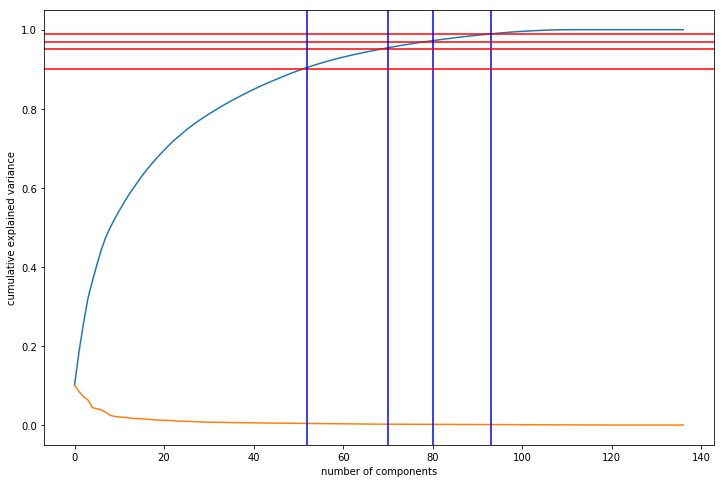

In [33]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=.99, color='r', linestyle='-')
plt.axvline(x=93, color='b', linestyle='-')
plt.axhline(y=.97, color='r', linestyle='-')
plt.axvline(x=80, color='b', linestyle='-')
plt.axhline(y=.95, color='r', linestyle='-')
plt.axvline(x=70, color='b', linestyle='-')
plt.axhline(y=.90, color='r', linestyle='-')
plt.axvline(x=52, color='b', linestyle='-')
plt.show()

> from the above plot, to explain the 
* Variance - Num Of Features (approx)
* 99-93
* 97-80
* 95-70
* 90-52

<font color='green'>lets choose 95% variance and lets proceed to Create a PCA</font>

### Apply Logit

* Lets observe the data set shape for different variance levels

In [34]:
#PCA with 99.5% variance
pca_995 = PCA(0.995)

df_train_pca_995 = pca_995.fit_transform(X_train_smote)
print("Train shape - ", df_train_pca_995.shape)

df_test_pca_995 = pca_995.transform(X_test)
print("Test shape - ", df_test_pca_995.shape)

Train shape -  (37596, 100)
Test shape -  (8552, 100)


In [35]:
learner_pca_995 = LogisticRegression(class_weight='balanced')
model_pca_995 = learner_pca_995.fit(df_train_pca_995,y_train_smote)

In [36]:
#Making prediction on the test data
pred_probs_995 = model_pca_995.predict_proba(df_test_pca_995)[:,1]
print("AUC score = ", "{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_995)))

y_pred_995 = model_pca_995.predict(df_test_pca_995)
print("Confusion Matrix - \n", metrics.confusion_matrix(y_test, y_pred_995))

# print other metrics

# accuracy
print("accuracy - ", metrics.accuracy_score(y_test, y_pred_995))

# precision
print("precision - ", metrics.precision_score(y_test, y_pred_995))

# recall/sensitivity
print("recall/sensitivity - ", metrics.recall_score(y_test, y_pred_995))

AUC score =  0.88
Confusion Matrix - 
 [[6650 1460]
 [  80  362]]
accuracy -  0.8199251637043966
precision -  0.1986827661909989
recall/sensitivity -  0.8190045248868778


In [37]:
# PCA with 99% variance explained
pca_99 = PCA(0.99)

df_train_pca_99 = pca_99.fit_transform(X_train_smote)
print("train shape = ", df_train_pca_99.shape)

df_test_pca_99 = pca_99.transform(X_test)
print("test shape = ", df_test_pca_99.shape)

train shape =  (37596, 95)
test shape =  (8552, 95)


In [38]:
learner_pca_99 = LogisticRegression()
model_pca_99 = learner_pca_99.fit(df_train_pca_99, y_train_smote)

In [39]:
#Making prediction on the test data
pred_probs_test_99 = model_pca_99.predict_proba(df_test_pca_99)[:,1]
print("AUC Score = ", "{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test_99)))

y_pred_99 = model_pca_99.predict(df_test_pca_99)
print("Confusoin Matrix - \n", metrics.confusion_matrix(y_test, y_pred_99))

# print other metrics

# accuracy
print("accuracy - ", metrics.accuracy_score(y_test, y_pred_99))

# precision
print("precision - ", metrics.precision_score(y_test, y_pred_99))

# recall/sensitivity
print("recall/sensitivity - ", metrics.recall_score(y_test, y_pred_99))

AUC Score =  0.88
Confusoin Matrix - 
 [[6654 1456]
 [  79  363]]
accuracy -  0.820509822263798
precision -  0.19956019791094007
recall/sensitivity -  0.8212669683257918


In [40]:
# PCA with 95% variance explained
pca_95 = PCA(0.95)

df_train_pca_95 = pca_95.fit_transform(X_train_smote)
print("train shape = ", df_train_pca_95.shape)

df_test_pca_95 = pca_95.transform(X_test)
print("test shape = ", df_test_pca_95.shape)

train shape =  (37596, 69)
test shape =  (8552, 69)


In [41]:
learner_pca_95 = LogisticRegression(class_weight='balanced')
model_pca_95 = learner_pca_95.fit(df_train_pca_95, y_train_smote)

In [42]:
#Making prediction on the test data
pred_probs_test_95 = model_pca_95.predict_proba(df_test_pca_95)[:,1]
print("{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test_95)))

y_pred_95 = model_pca_95.predict(df_test_pca_95)
print(metrics.confusion_matrix(y_test, y_pred_95))

# print other metrics

# accuracy
print("accuracy - ", metrics.accuracy_score(y_test, y_pred_95))

# precision
print("precision - ", metrics.precision_score(y_test, y_pred_95))

# recall/sensitivity
print("recall/sensitivity - ", metrics.recall_score(y_test, y_pred_95))

0.88
[[6623 1487]
 [  83  359]]
accuracy -  0.8164172123479888
precision -  0.19447453954496208
recall/sensitivity -  0.8122171945701357


In [43]:
# cross verify
confusion_mat_lr_95 = metrics.confusion_matrix(y_test, y_pred_95)
TN = confusion_mat_lr_95[0, 0]
FP = confusion_mat_lr_95[0, 1]
FN = confusion_mat_lr_95[1, 0]
TP = confusion_mat_lr_95[1, 1]

sensitivity_svm = TP / float(FN + TP)
print("sensitivity_svm",sensitivity_svm)

sensitivity_svm 0.8122171945701357


In [44]:
pca_90 = PCA(0.90)

df_train_pca_90 = pca_90.fit_transform(X_train_smote)
print("train shape = ", df_train_pca_90.shape)

df_test_pca_90 = pca_90.transform(X_test)
print("test shape = ", df_test_pca_90.shape)

corrmat = np.corrcoef(df_train_pca_90.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min())

train shape =  (37596, 52)
test shape =  (8552, 52)
max corr: 1.0048974151815063e-15 , min corr:  -1.2741764300086613e-15


In [45]:
learner_pca_90 = LogisticRegression(class_weight='balanced')
model_pca_90 = learner_pca_90.fit(df_train_pca_90, y_train_smote)

In [46]:
#Making prediction on the test data
pred_probs_test_90 = model_pca_90.predict_proba(df_test_pca_90)[:,1]
print("AUC Score = ", "{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test_90)))

y_pred_90 = model_pca_90.predict(df_test_pca_90)
print("Confusoin Matrix - \n", metrics.confusion_matrix(y_test, y_pred_90))

# print other metrics

# accuracy
print("accuracy - ", metrics.accuracy_score(y_test, y_pred_90))

# precision
print("precision - ", metrics.precision_score(y_test, y_pred_90))

# recall/sensitivity
print("recall/sensitivity - ", metrics.recall_score(y_test, y_pred_90))

AUC Score =  0.88
Confusoin Matrix - 
 [[6618 1492]
 [  87  355]]
accuracy -  0.8153648269410664
precision -  0.19220357336220897
recall/sensitivity -  0.8031674208144797


In [47]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

### lets go ahead with 95% variance explained

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_95, drop_intermediate = False)

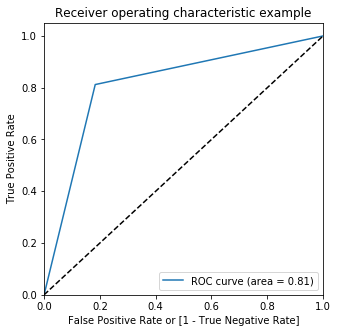

(array([0.        , 0.18335388, 1.        ]),
 array([0.        , 0.81221719, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [49]:
draw_roc(y_test, y_pred_95)

* with probability cut-off at ~0.2, TPR > 81 can be achieved

As the probability cut off increases, more variance can be explained

> <font color='green'>Business case - Need to Identify potential Churns; So we need to identify '1'(churn case); So True positives should be higher in the model classifier => Recall/Sensitivity should be higher. So the main evaluation parameter would be recall/sensitivity</font>

> Following, <font color='red'>'recall'</font> would be used as scoring parameter in gridsearch of the models

### Trail with GridSearch - Logit

In [50]:
from sklearn.model_selection import GridSearchCV

# params = {'C': [0.001,0.01,0.1,1,10,100,1000], 'penalty' :['l2']}
params = {'C': [0.001,0.01,0.1,1,2,3,4], 'penalty' :['l2']}
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)

model_lr = LogisticRegression(class_weight='balanced')
# cross validation to measure the score of choosen metric(accuracy here) on the train data
folds = 5
model_cv_lr = GridSearchCV(
                        estimator = model_lr, 
                        param_grid = params,
                        scoring =  'recall',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1) 
## This step would take more time, to run the job parallel we are employing the all the processers in the target machine so n_jobs=-1


In [51]:
#Fit: The instance of the estimator learns from the data, creating a parametrised model
model_cv_lr.fit(df_train_pca_95, y_train_smote)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   16.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 3, 4], 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [52]:
print('Done')

Done


In [53]:
cv_results = pd.DataFrame(model_cv_lr.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.533430,0.100872,0.013659,0.003962,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.823404,0.838564,0.839628,...,0.831737,0.008128,7,0.834087,0.830164,0.829964,0.835029,0.830574,0.831963,0.002148
1,1.944313,0.218531,0.010692,0.005902,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.828457,0.840957,0.844415,...,0.836578,0.006779,6,0.839274,0.835018,0.835483,0.839816,0.837223,0.837363,0.001935
2,2.267373,0.550157,0.010103,0.004833,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.828989,0.841755,0.844947,...,0.837536,0.006965,5,0.840737,0.835949,0.836946,0.840282,0.837822,0.838347,0.001868
3,2.125579,0.570497,0.009832,0.001350,1,l2,"{'C': 1, 'penalty': 'l2'}",0.828723,0.841755,0.845745,...,0.837855,0.007062,1,0.840604,0.836082,0.836946,0.840282,0.837955,0.838374,0.001793
4,2.127804,0.421036,0.012156,0.003119,2,l2,"{'C': 2, 'penalty': 'l2'}",0.828723,0.841755,0.845745,...,0.837855,0.007062,1,0.840670,0.836082,0.836946,0.840282,0.837955,0.838387,0.001810


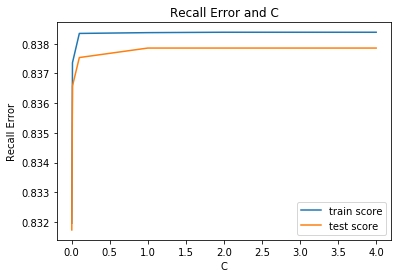

In [54]:
# plotting mean test and train scores with parameter 'C' 
# cv_results['param_C'] = cv_results['param_C'].astype('int32')
# plotting
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Recall Error')
plt.title("Recall Error and C")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [55]:
# View best hyperparameters
print('Best Penalty:', model_cv_lr.best_estimator_.get_params()['penalty'])
print('Best C:', model_cv_lr.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1


> <font color=green> small C value leads to increase the regularization strenght => creation of simple models that tend to underfit the data. By using bigger C values, the model can increase it's complexity and adjust better to the data. So we choose that C which offers the smallest difference between the training and testing accuracy </font>

In [56]:
# model_cv_lr.best_estimator_.get_params()['C']

In [57]:
# with best value of 'c'
model_lr_best = LogisticRegression(C=model_cv_lr.best_estimator_.get_params()['C'], class_weight='balanced', penalty='l2')
  
model_lr_best.fit(df_train_pca_95, y_train_smote)

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [58]:
#Making prediction on the test data with tunned model and check the roc_auc metrics score
pred_probs_best = model_lr_best.predict_proba(df_test_pca_95)[:,1]
print("ROC_AUC on test data after tuning={:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_best)))

ROC_AUC on test data after tuning=0.88


In [59]:
y_pred_df = pd.DataFrame(pred_probs_best)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]
# Let's see the head
print(y_pred_1.head())

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting ID to index
y_test_df['ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churn','churn_Prob'], axis=1)

# Let's see the head of y_pred_final
print(y_pred_final.head())

          0
0  0.207138
1  0.982296
2  0.980424
3  0.370938
4  0.662098
      ID  churn  churn_Prob
0  11701      0    0.207138
1  26714      0    0.982296
2  20293      0    0.980424
3   1433      0    0.370938
4  25489      0    0.662098


In [60]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,ID,churn,churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,11701,0,0.207138,1,1,1,0,0,0,0,0,0,0
1,26714,0,0.982296,1,1,1,1,1,1,1,1,1,1
2,20293,0,0.980424,1,1,1,1,1,1,1,1,1,1
3,1433,0,0.370938,1,1,1,1,0,0,0,0,0,0
4,25489,0,0.662098,1,1,1,1,1,1,1,0,0,0


In [61]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensi = cm[1,1]/(cm[1,1]+cm[1,0])
    speci = cm[0,0]/(cm[0,1]+cm[0,0])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.051684     1.000000     0.000000
0.1   0.1  0.386576     0.970588     0.354747
0.2   0.2  0.545837     0.936652     0.524538
0.3   0.3  0.664991     0.891403     0.652651
0.4   0.4  0.751286     0.861991     0.745253
0.5   0.5  0.816417     0.812217     0.816646
0.6   0.6  0.868452     0.753394     0.874723
0.7   0.7  0.905753     0.685520     0.917756
0.8   0.8  0.928672     0.554299     0.949075
0.9   0.9  0.943054     0.312217     0.977435


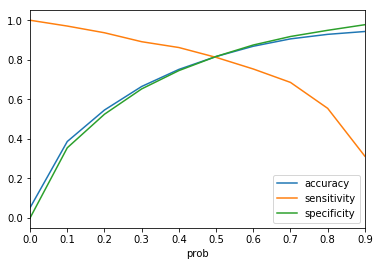

In [62]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

<Figure size 864x576 with 0 Axes>

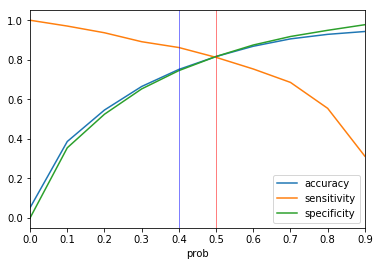

In [63]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.axvline(x=0.4, color='b', linestyle='-', linewidth=.5)
plt.axvline(x=0.5, color='r', linestyle='-', linewidth=.5)

> Inference - From the above plot we can choose our probability value as 0.4 as at this point the sensitivity is good (Initial sensitivity is 0.81, we need better or similar after tuning the model)

In [64]:
y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,ID,churn,churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,11701,0,0.207138,1,1,1,0,0,0,0,0,0,0,0
1,26714,0,0.982296,1,1,1,1,1,1,1,1,1,1,1
2,20293,0,0.980424,1,1,1,1,1,1,1,1,1,1,1
3,1433,0,0.370938,1,1,1,1,0,0,0,0,0,0,0
4,25489,0,0.662098,1,1,1,1,1,1,1,0,0,0,1


#### Final Values after tuning the model

In [65]:
#Making prediction on the test data
print("AUC Score = ", "{:2.2f}".format(metrics.roc_auc_score(y_pred_final['churn'], y_pred_final['final_predicted'])))

y_pred_90 = model_pca_90.predict(df_test_pca_90)
print("Confusoin Matrix - \n", metrics.confusion_matrix(y_pred_final['churn'], y_pred_final['final_predicted']))

# print other metrics

# accuracy
print("accuracy - ", metrics.accuracy_score(y_pred_final['churn'], y_pred_final['final_predicted']))

# precision
print("precision - ", metrics.precision_score(y_pred_final['churn'], y_pred_final['final_predicted']))

# recall/sensitivity
print("recall/sensitivity - ", metrics.recall_score(y_pred_final['churn'], y_pred_final['final_predicted']))

AUC Score =  0.80
Confusoin Matrix - 
 [[6044 2066]
 [  61  381]]
accuracy -  0.7512862488306828
precision -  0.15570085819370658
recall/sensitivity -  0.8619909502262444


* After tuning the model, the sensitivity/recall is increased; Helping to predict correct churns

### Apply SVM

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# SVC(kernal=)

In [70]:
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)

# specify range of parameters (C) as a list
# params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
params = {"kernel": ['poly','rbf']}

# handling class imbalance in model
model = SVC(class_weight='balanced',C=100)

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_pca_svm = GridSearchCV(estimator = model, 
                             param_grid = params, 
                             scoring= 'recall', 
                             cv = folds, 
                             verbose = 1,
                             return_train_score=True,n_jobs=-1)

<font color=red> <b> The below step will take approx 15 mins to execute </b> </font>

In [71]:
# fit the model
model_pca_svm.fit(df_train_pca_95, y_train_smote)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  4.8min remaining: 14.3min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  7.0min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['poly', 'rbf']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=1)

In [72]:
print("Test")

Test


In [73]:
# cv results
cv_results = pd.DataFrame(model_pca_svm.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,380.461600,4.338948,7.803621,0.170470,poly,{'kernel': 'poly'},0.993807,0.994252,0.994126,0.994195,0.994095,0.000172,2,0.999787,0.999929,0.999929,0.999859,0.999876,0.000059
1,252.488687,22.269799,9.686538,0.718511,rbf,{'kernel': 'rbf'},0.996156,0.996168,0.995804,0.996990,0.996280,0.000435,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3099: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


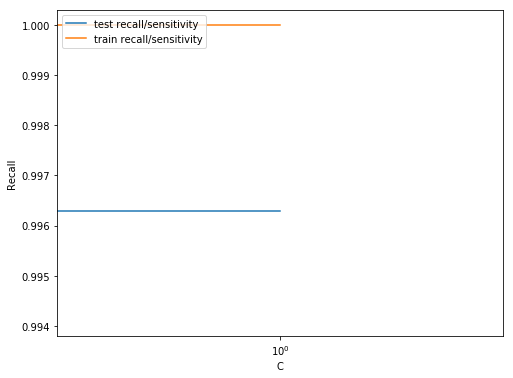

In [75]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_kernel'], cv_results['mean_test_score'])
plt.plot(cv_results['param_kernel'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall/sensitivity', 'train recall/sensitivity'], loc='upper left')
plt.xscale('log')

In [76]:
# printing the optimal accuracy score and hyperparameters
best_score = model_pca_svm.best_score_
# best_C = model_pca_svm.best_params_['C']
best_kernel = model_pca_svm.best_params_['kernel']

print(" The highest test recall is {0} at C = {1}".format(best_score, best_kernel))

 The highest test recall is 0.9962796151400245 at C = rbf


* Build the model with best hyper parameters

In [77]:
# model with the best value of C
svm_model_best = SVC(C=100, class_weight='balanced',kernel=best_kernel)

# fit
svm_model_best.fit(df_train_pca_95, y_train_smote)

# predict
y_pred = svm_model_best.predict(df_test_pca_95)

In [78]:
# metrics
# print other metrics

# accuracy
print("accuracy = ", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision = ", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall/sensitivity = ", metrics.recall_score(y_test, y_pred))

print("AUC = ", metrics.roc_auc_score(y_test, y_pred))

print("Confusion Matrix = \n", metrics.confusion_matrix(y_test, y_pred))


accuracy =  0.9299579045837231
precision =  0.33403805496828753
recall/sensitivity =  0.3574660633484163
AUC =  0.6593125631168715
Confusion Matrix = 
 [[7795  315]
 [ 284  158]]


In [183]:
# metrics
# print other metrics

# accuracy
print("accuracy = ", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision = ", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall/sensitivity = ", metrics.recall_score(y_test, y_pred))

print("AUC = ", metrics.roc_auc_score(y_test, y_pred))

print("Confusion Matrix = \n", metrics.confusion_matrix(y_test, y_pred))


accuracy =  0.9299579045837231
precision =  0.33403805496828753
recall/sensitivity =  0.3574660633484163
AUC =  0.6593125631168715
Confusion Matrix = 
 [[7795  315]
 [ 284  158]]


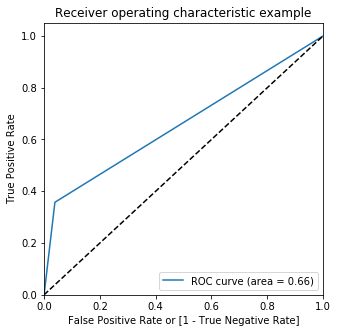

(array([0.        , 0.03884094, 1.        ]),
 array([0.        , 0.35746606, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [184]:
draw_roc(y_test, y_pred)

## Final Inferences

> <font color=blue><b> Logistic Regression
    * Accuracy -  0.75
    * Precision -  0.15
    * Recall/sensitivity -  0.86
    * AUC - 0.8
    * Confusion Matrix
    [[6044 2066]
     [  61  381]]
    
------------
> <font color=blue><b> SVM
    * Accuracy =  0.93
    * Precision =  0.34
    * Recall/Sensitivity =  0.36
    * AUC =  0.66
    * Confusion Matrix = 
     [[7795  315]
     [ 284  158]]       


- Comparing both, SVM has better Accuracy and Precision and less Recall

<b> Business Goal - To reduce customer churn, telecom companies need to predict which customers are at high risk of churn

> <i>To help with the same, we need to predict the 'churns' which is '1' in this case; So we need to rely upon the recall/sensitivity parameter.
    
<font color=green> Based on the Sensitivity/Recall Value, we propose to use the <i>"Logistic regression"</i> model to identify the possible churns</font>

In [185]:
model_lr_best.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)>

> <font color=green> Above model<b>(model_lr_best)</b> can be used to predict the possible churn customers</font>

## SGD Classifier

In [81]:
from sklearn.linear_model import SGDClassifier

In [88]:
sgd = SGDClassifier(class_weight='balanced', shuffle=True)

In [89]:
sgd.fit(df_train_pca_95, y_train_smote)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
y_pred_sgd = sgd.predict(df_test_pca_95)

In [91]:
metrics.confusion_matrix(y_test, y_pred_sgd)

array([[6301, 1809],
       [ 105,  337]], dtype=int64)

In [92]:
metrics.recall_score(y_test,y_pred_sgd)

0.7624434389140271

In [94]:
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)

# specify range of parameters (C) as a list
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# handling class imbalance in model
model_sgd = SGDClassifier(class_weight='balanced', shuffle=True, n_jobs=-1)

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_ds_sgd = GridSearchCV(estimator = model, 
                             param_grid = params, 
                             scoring= 'recall', 
                             cv = folds, 
                             verbose = 1,
                             return_train_score=True,n_jobs=-1)

In [95]:
# fit the model
model_ds_sgd.fit(df_train_pca_95, y_train_smote)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 17.7min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [96]:
# cv results
cv_results = pd.DataFrame(model_ds_sgd.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,267.787023,6.005612,47.912325,0.136569,0.01,{'C': 0.01},0.714286,0.722376,0.717852,0.725005,0.719880,0.004120,6,0.722352,0.720871,0.727247,0.718598,0.722267,0.003171
1,209.537090,6.029727,36.278703,0.126867,0.1,{'C': 0.1},0.846039,0.852885,0.853996,0.863900,0.854205,0.006373,5,0.863337,0.864761,0.865797,0.858910,0.863201,0.002627
2,207.538183,6.238016,25.708367,0.087384,1,{'C': 1},0.956865,0.966787,0.966226,0.969254,0.964783,0.004711,4,0.973007,0.971350,0.970708,0.972362,0.971857,0.000888
3,200.573593,2.985207,15.483903,0.241417,10,{'C': 10},0.990604,0.994039,0.993917,0.993980,0.993135,0.001462,3,0.996812,0.998014,0.997434,0.997243,0.997376,0.000432
4,250.185207,23.049943,10.089539,0.672092,100,{'C': 100},0.996156,0.996168,0.995804,0.996990,0.996280,0.000435,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,281.747938,21.600346,6.773081,0.267478,1000,{'C': 1000},0.994662,0.994890,0.994126,0.996775,0.995113,0.000999,2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


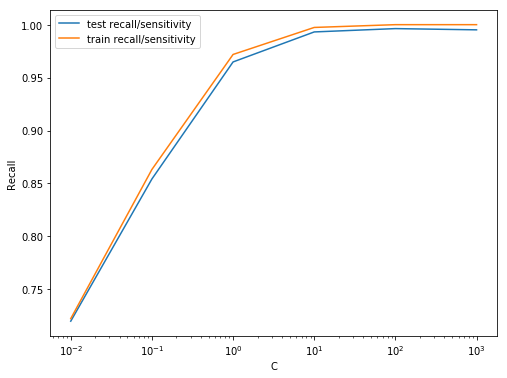

In [97]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall/sensitivity', 'train recall/sensitivity'], loc='upper left')
plt.xscale('log')

In [101]:
# printing the optimal accuracy score and hyperparameters
best_score = model_ds_sgd.best_score_
best_C = model_ds_sgd.best_params_['C']
# best_kernel = model_pca_svm.best_params_['kernel']

print(" The highest test recall is {0} at C = {1}".format(best_score, best_kernel))

 The highest test recall is 0.9962796151400245 at C = rbf
